In [1]:
import pandas as pd
import plotly as py
import plotly.graph_objs as go
import plotly.express as ex
import numpy as np
from sklearn.preprocessing import StandardScaler

import cufflinks
cufflinks.go_offline(connected=True)

In [2]:
df19 = pd.read_csv("./2019_april_clean.csv")
df19.drop(columns=["humidity", "dew"], inplace=True)
df20 = pd.read_csv("./2020_april_clean.csv")
df20.drop(columns=["humidity", "dew"], inplace=True)
df21 = pd.read_csv("./2021_april_clean.csv")
df21.drop(columns=["humidity", "dew"], inplace=True)

In [33]:
def pca(df):
    df_avg = averages(df)
    df_avg = df_avg.iloc[:,1:].to_numpy()
    df = df.iloc[:,2:]
    #scale = StandardScaler()
    data = df.to_numpy()
    #data = scale.fit_transform(data)
    #df_avg = scale.transform(df_avg)
    data -= data.mean(axis=0)
    cov_mat = np.cov(data, rowvar=False)
    ev, e_vecs = np.linalg.eigh(cov_mat)
    print(sum(ev[-2:]/np.sum(ev)))
    evec = e_vecs[:,-2:]
    df_eg = df_avg @ evec
    return df_eg


In [3]:
def averages(df):
    final = pd.DataFrame(np.zeros((18,df.shape[1] - 1)), columns= ["City"] +list(df.columns)[2:])
    for i in range(18):
        df_ = df.iloc[i*30:i*30 + 30,2:].to_numpy()
        final["City"][i] = df["City"][i*30]
        final.iloc[i,1:] = np.mean(df_, axis=0)
    return final

In [4]:
df19_avg = averages(df19)
df20_avg = averages(df20)
df21_avg = averages(df21)

In [22]:
df19_aqi = label(df19_avg)
df19_aqi.sort_values("AQI", inplace=True)
df20_aqi = label(df20_avg)
df20_aqi.sort_values("AQI", inplace=True)
df21_aqi = label(df21_avg)
df21_aqi.sort_values("AQI", inplace=True)

In [23]:
df19_aqi.head()

,City,AQI,Cat
8,Chennai,66.633333,Moderate
11,Mumbai,75.366667,Moderate
10,Visakhapatnam,77.650000,Moderate
15,Thiruvananthapuram,77.750000,Moderate
0,Hyderabad,100.983333,Unhealthy for Sensitive Groups


In [6]:
def level(val):
    if val>=0 and val<=50: return 'Good'
    elif val>=50 and val<=100: return 'Moderate'
    elif val>=100 and val<=150: return 'Unhealthy for Sensitive Groups'
    elif val>=150 and val<=200: return 'Unhealthy'
    elif val>=200 and val<=300: return 'Very Unhealthy'
    elif val>=300: return 'Hazardous'

In [7]:
def label(df):
    aqi = df.iloc[:,1:].max(axis=1)
    lab = aqi.copy()
    for i in range(18):
        lab[i] = level(aqi[i])
    df_labels = pd.concat([df["City"],aqi,lab], axis = 1)
    df_labels.columns = ["City","AQI", "Cat",]
    return df_labels

In [37]:
df19_eg = pca(df19)
df20_eg = pca(df20)
df21_eg = pca(df21)

0.9642374542068665
0.9697473361214508
0.945133871066588


In [27]:
cities = list(df19.City.unique())

fig = go.Figure(data=[go.Bar(name="2019", x=cities, y= list(df19_avg["pm25"])),
go.Bar(name="2020", x=cities, y= list(df20_avg["pm25"])),
go.Bar(name="2021", x=cities, y= list(df21_avg["pm25"]))])

fig.update_layout(barmode='group')
fig.show()

In [30]:
cities = list(df19.City.unique())

fig = go.Figure(data=[go.Bar(name="2019", x=cities, y= list(df19_avg["pm10"])),
go.Bar(name="2020", x=cities, y= list(df20_avg["pm10"])),
go.Bar(name="2021", x=cities, y= list(df21_avg["pm10"]))])

fig.update_layout(barmode='group')
fig.show()

In [25]:
cities = list(df19.City.unique())

fig = go.Figure(data=[go.Bar(name="2019", x=cities, y= list(df19_avg["so2"])),
go.Bar(name="2020", x=cities, y= list(df20_avg["so2"])),
go.Bar(name="2021", x=cities, y= list(df21_avg["so2"]))])

fig.update_layout(barmode='group')
fig.show()

In [29]:
cities = list(df19.City.unique())

fig = go.Figure(data=[go.Bar(name="2019", x=cities, y= list(df19_avg["co"])),
go.Bar(name="2020", x=cities, y= list(df20_avg["co"])),
go.Bar(name="2021", x=cities, y= list(df21_avg["co"]))])

fig.update_layout(barmode='group')
fig.show()

In [31]:
cities = list(df19.City.unique())

fig = go.Figure(data=[go.Bar(name="2019", x=cities, y= list(df19_avg["no2"])),
go.Bar(name="2020", x=cities, y= list(df20_avg["no2"])),
go.Bar(name="2021", x=cities, y= list(df21_avg["no2"]))])

fig.update_layout(barmode='group')
fig.show()

In [32]:
cities = list(df19.City.unique())

fig = go.Figure(data=[go.Bar(name="2019", x=cities, y= list(df19_avg["o3"]), ),
go.Bar(name="2020", x=cities, y= list(df20_avg["o3"])),
go.Bar(name="2021", x=cities, y= list(df21_avg["o3"]))])

fig.update_layout(barmode='group')
fig.show()

<AxesSubplot:>

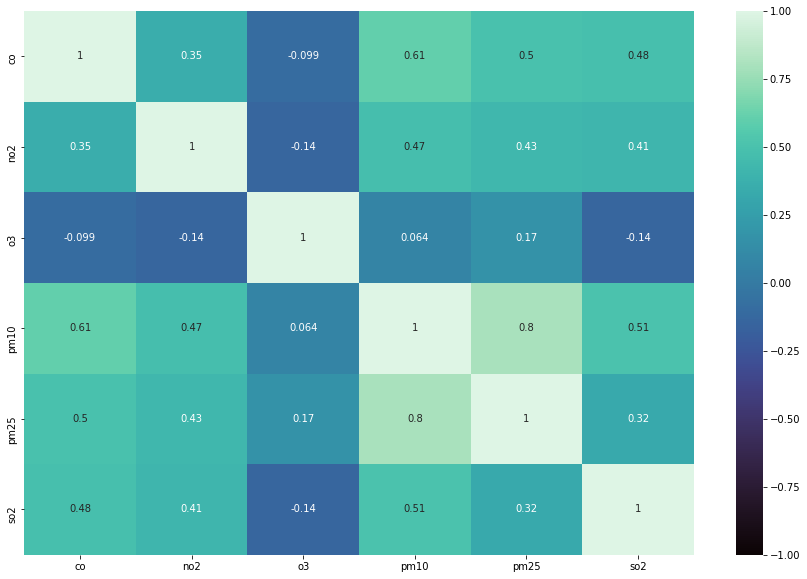

In [10]:
R = df21.iloc[:,2:].corr()

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))
sns.heatmap(R, annot = True, cmap='mako', vmin=-1, vmax=1)#,mask=np.triu(np.ones_like(R)))
#plt.title('Correlations between factors', fontsize=20)

In [ ]:
c = "Mumbai"
df_1 = df19[df19["City"] == c]
df_2 = df20[df20["City"] == c]
df_3 = df21[df21["City"] == c]
fig = ex.line(x= df_1["Date"], y=[df_1["pm25"], df_2["pm25"]] )
fig.update_layout(width= 600*1.3, height = 450*1.3)
fig.show()

In [43]:
df = df19_eg
fig = ex.scatter(x = df[:,0], y = df[:,1], text= df19_avg["City"], labels=dict(x="PC1", y="PC2"))
fig.update_traces(textposition='bottom center',)
fig.update_layout(width= 600*1.5, height = 450*1.5)
fig.show()

In [44]:
df = df20_eg
fig = ex.scatter(x = df[:,0], y = df[:,1], text= df19_avg["City"], labels=dict(x="PC1", y="PC2"))
fig.update_traces(textposition='bottom center', )
fig.update_layout(width= 600*1.5, height = 450*1.5)
fig.show()

In [45]:
df = df21_eg
fig = ex.scatter(x = df[:,0], y = df[:,1], text= df19_avg["City"], labels=dict(x="PC1", y="PC2"))
fig.update_traces(textposition='top right', )
fig.update_layout(width= 600*1.5, height = 450*1.5)
fig.show()

In [26]:
df = df21_aqi
cities = list(df.City.unique())

fig = go.Figure(data = go.Bar(name="2020", y=cities, x= df['AQI'], orientation="h", text=df["Cat"],textposition='auto'))

fig.update_layout( width=520, height=650)
fig.show()

In [19]:
cities = list(df19.City.unique())

fig = go.Figure(data = go.Bar(name="2020", y=cities, x= list(df20_aqi), orientation="h"))

fig.update_layout( width=450, height=650)
fig.show()